# Modelo de predicción del precio de la Circonia Cúbica

## Contexto del problema
* La empresa Gem Stones Co Ltd, dedicada a la fabricación de circonita cúbica (una alternativa económica al diamante con cualidades similares),  La empresa se enfrenta al desafío de maximizar sus ganancias al determinar los precios óptimos para sus circonitas cúbicas. han proporcionado un conjunto de datos que contiene información sobre los precios y otros atributos de casi 27,000 circonitas cúbicas.

## Objetivo
* El objetivo es desarrollar un modelo predictivo que pueda predecir con precisión el precio de cada piedra en función de estos atributos. Esto permitirá a Gem Stones Co Ltd distinguir entre piedras más rentables y menos rentables, lo que les ayudará a optimizar su estrategia de precios y aumentar sus ganancias

Este dataset extraido de *Kaggle* (nombrado: **Gemstone Price Prediction** ) contiene información sobre **circonita cúbica**, los cuales serán usados para la predicción de precios de venta, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****
    
Nombre de la variable: Descripción
* Carat: Peso en quilates de la circonia cúbica.
* Cut: Describe la calidad del corte de la circonia cúbica. La calidad aumenta en orden de Fair (regular), Good (buena), Very Good (muy buena), Premium (premium), Ideal (ideal).
* Color: Color de la circonia cúbica. Con D siendo el mejor y J el peor.
* Clarity: La claridad de la circonia cúbica se refiere a la ausencia de inclusiones y defectos. (En orden de mejor a peor, FL = impecable, I3 = nivel 3 de inclusiones) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.
* Depth: La altura de una circonia cúbica, medida desde el Culet hasta la tabla, dividida por su diámetro medio del cinturón.
* Table: El ancho de la tabla de la circonia cúbica expresado como un porcentaje de su diámetro promedio.
* Price: El precio de la circonia cúbica.
* X: Longitud de la circonia cúbica en milímetros.
* Y: Ancho de la circonia cúbica en milímetros.
* Z: Altura de la circonia cúbica en milímetros.

    
****

    
Url origen datos: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction/data
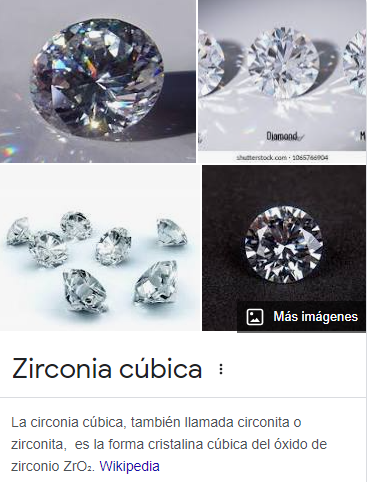

# Preparación del dataset de ventas de vehículos

## 1. Librerias y configuraciones previas


In [7]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [8]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from funciones import multiple_plot

## 3. Carga del dataset

In [9]:
#Cargar el dataset
d=pd.read_csv('/content/(gemstone)cubic_zirconia.csv')

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [11]:
d.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## 4. Limpieza de datos (Data Cleaning)

In [12]:
#Borrando columnas que no se utilizarán

d.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [13]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [14]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

## 5. Visualización de datos

### Variables de entrada

In [15]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF


In [16]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


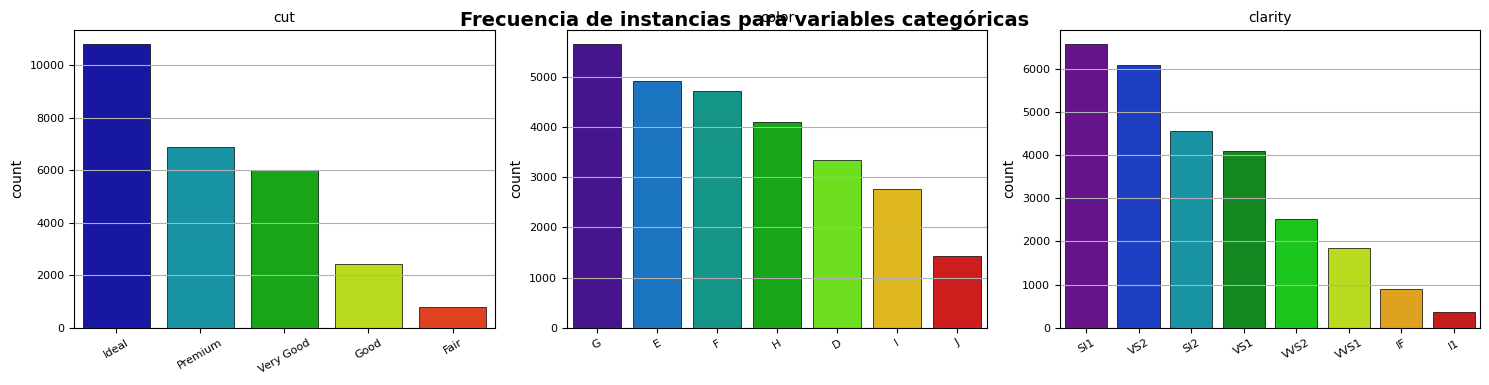

In [17]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [18]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== cut ====================
cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

===== color ====================
color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

===== clarity ====================
clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64



In [19]:
#multiple_plot(1, d , 'Make', 'Price', 'boxplot', 'Distribución de la variable próposito vs la edad',90)

Text(0.5, 1.1, 'Distribución de la variable Make vs. el precio')

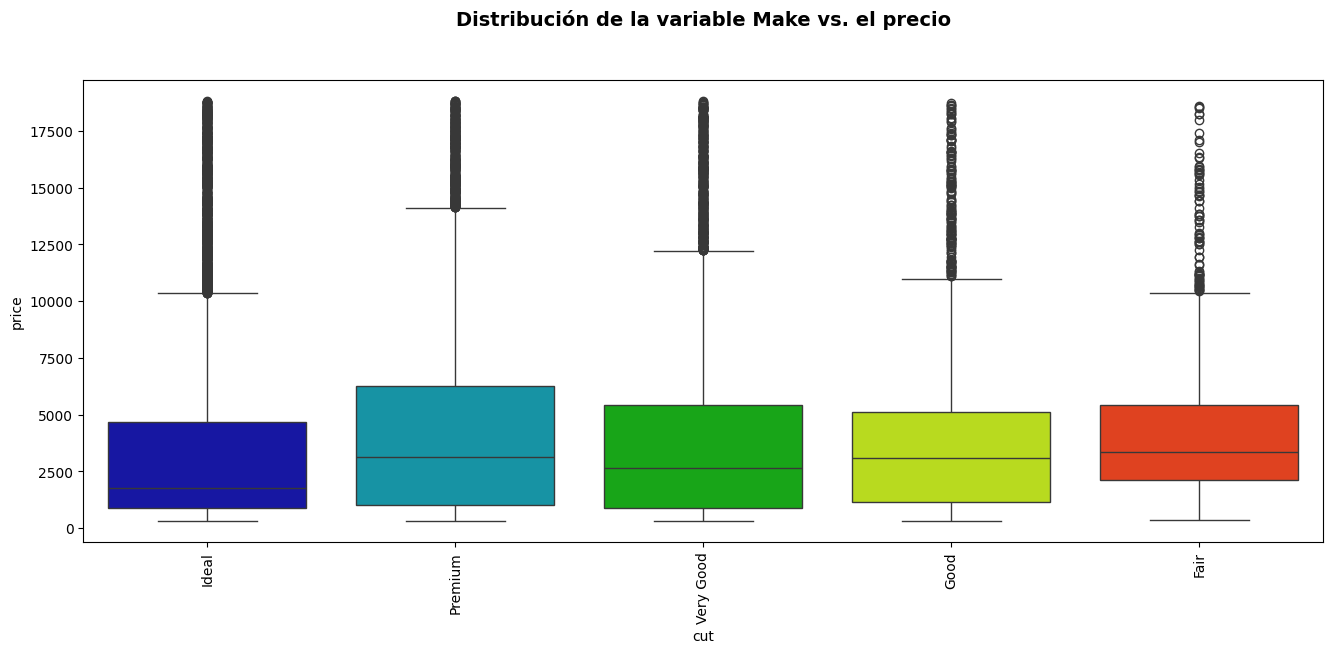

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
ax_cond = axes
sns.boxplot(data=d,
            x='cut',
            y='price',
            ax=axes,
            palette='nipy_spectral',
            zorder=1
            )
# Personalizar el eje x
ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=90)
# Configurar título
ax_cond.set_title('Distribución de la variable Make vs. el precio', fontsize=14, fontweight="bold", y=1.1)

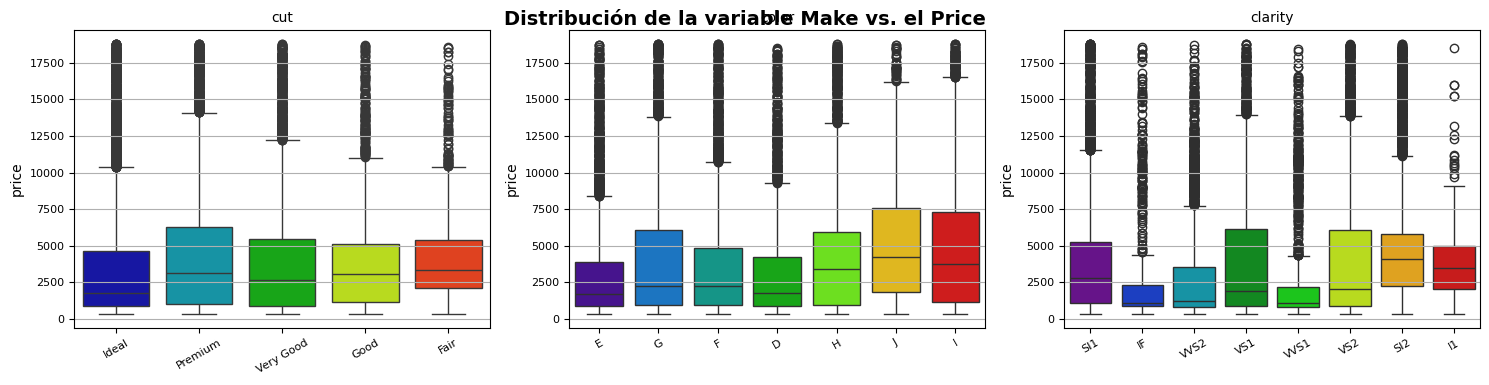

In [21]:
multiple_plot(3, d , catCols, 'price', 'boxplot', 'Distribución de la variable Make vs. el Price',30)

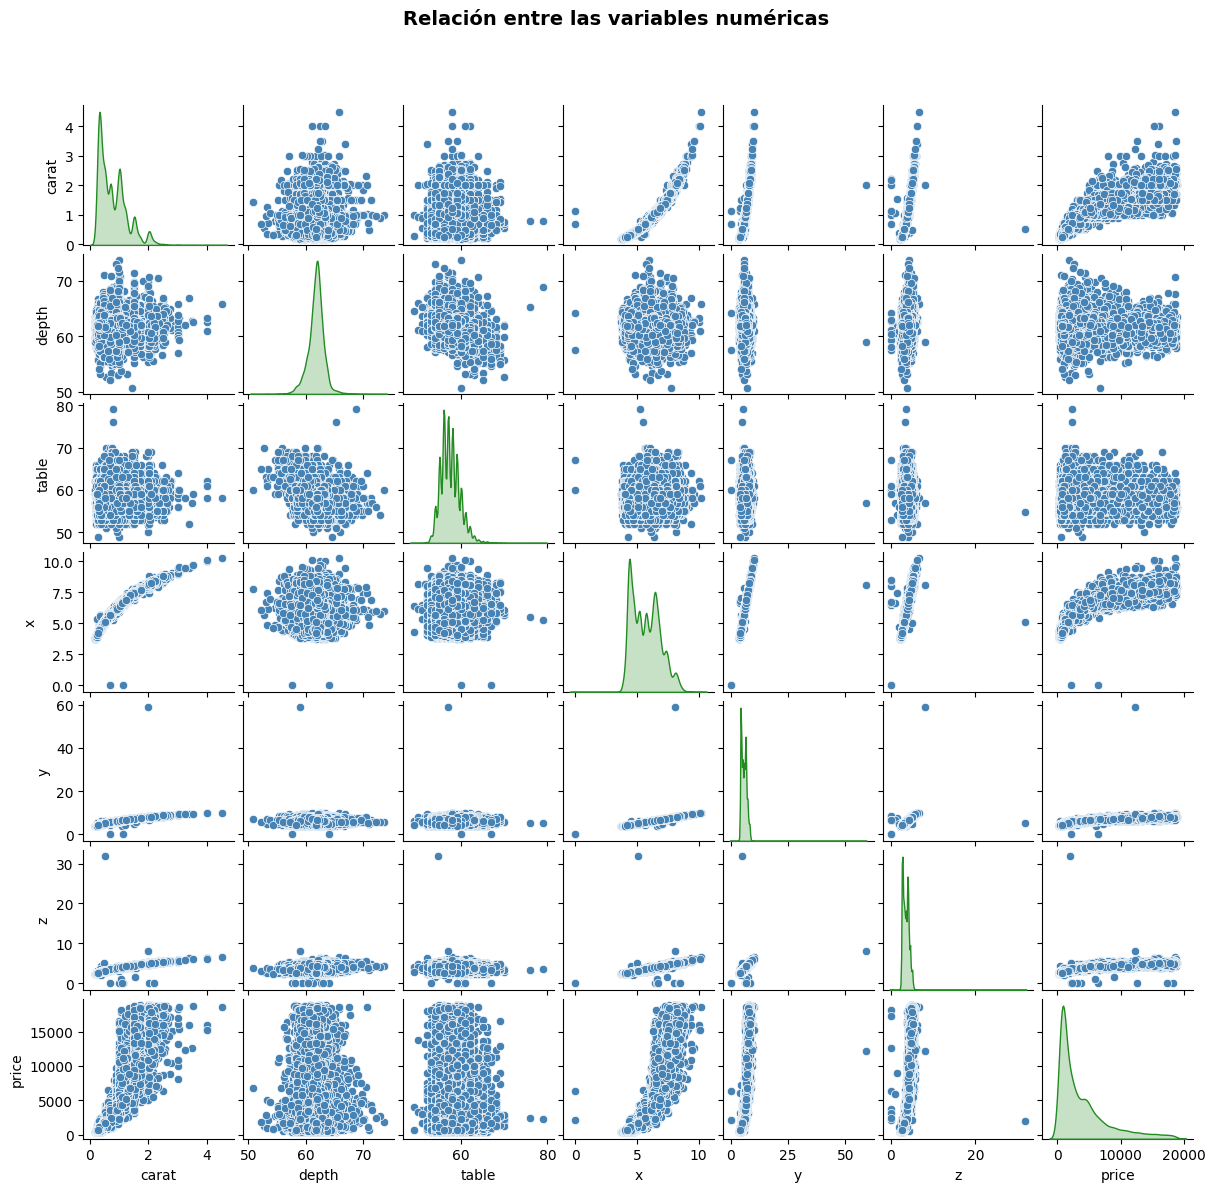

In [22]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

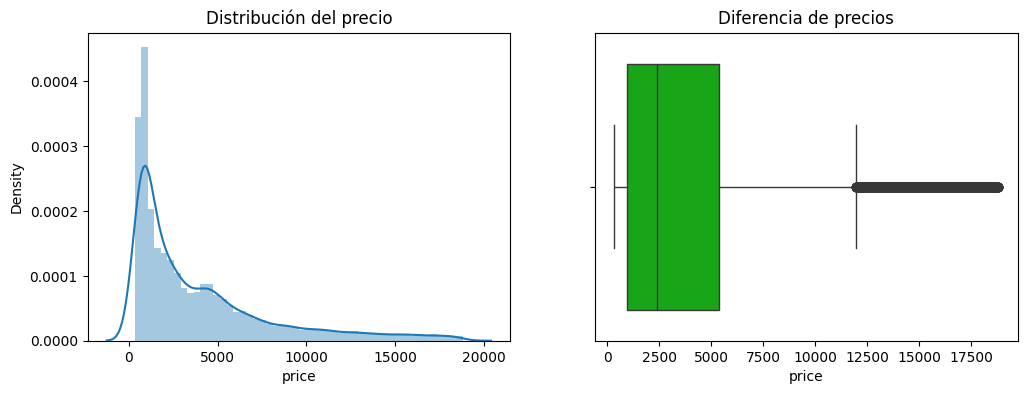

In [23]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución del precio')
sns.distplot(d['price'])

plt.subplot(1,2,2)
plt.title('Diferencia de precios')
sns.boxplot(x=d['price'], palette='nipy_spectral')

plt.show()

In [24]:
#Descripción del precio de los vehículos: Total, media, desviación, mínimo, máximo y percentiles

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   26933
mean     3938
std      4023
min       326
25%       945
50%      2375
75%      5356
85%      7695
90%      9915
95%     13205
97.5%   15709
100%    18818
max     18818
Name: price, dtype: float64


## 6. Preparación de datos

### Valores atípicos de la variable de salida

In [25]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(d['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(d['price'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')


Valor atípico leve inferior:-5671.5
Valor atípico leve superior:11972.5


In [26]:
# Se eliminan los valores atípicos
d = d.drop(d[d['price']>VASup].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

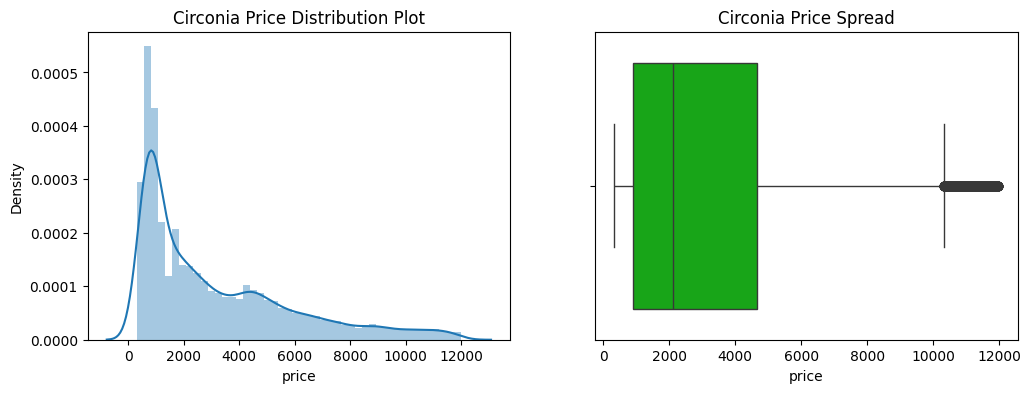

In [27]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Circonia Price Distribution Plot')
sns.distplot(d['price'])

plt.subplot(1,2,2)
plt.title('Circonia Price Spread')
sns.boxplot(x=d['price'], palette='nipy_spectral')

plt.show()

In [ ]:
#Descripción del precio de los vehículos después de eliminar valores atípicos

print(d['price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count   25155
mean     3154
std      2783
min       326
25%       905
50%      2122
75%      4670
85%      6208
90%      7396
95%      9241
97.5%   10484
100%    11971
max     11971
Name: price, dtype: float64


### Imputaciones

In [ ]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

carat 0
depth 646
table 0
x 0
y 0
z 0
price 0


In [ ]:
#Imputación de variables numéricas por medio de KNNImputer

# crear un objeto KNNImputer con k=5
imputer = KNNImputer(n_neighbors=5)

# imputar los valores faltantes en el dataframe
df_imputed = imputer.fit_transform(d[numCols])

# convertir el arreglo numpy devuelto por el imputer en un dataframe
df_imputed = pd.DataFrame(df_imputed, columns=numCols)

# imprimir el dataframe con los valores imputados
df_imputed.head()

,carat,depth,table,x,y,z,price
0,0,62,58,4,4,3,499
1,0,61,58,4,4,3,984
2,1,62,60,6,6,4,6289
3,0,62,56,5,5,3,1082
4,0,60,59,4,4,3,779


In [ ]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

carat 0
depth 646
table 0
x 0
y 0
z 0
price 0


In [ ]:
#Identificación de valores nulos para las variables numéricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

cut 0
color 0
clarity 0


In [ ]:
#Integración de los dos dataframes (categoricos y numéricos) después de la imputación
d = pd.merge(df_imputed, d[catCols], left_index=True, right_index=True)
d.head()

,carat,depth,table,x,y,z,price,cut,color,clarity
0,0,62,58,4,4,3,499,Ideal,E,SI1
1,0,61,58,4,4,3,984,Premium,G,IF
2,1,62,60,6,6,4,6289,Very Good,E,VVS2
3,0,62,56,5,5,3,1082,Ideal,F,VS1
4,0,60,59,4,4,3,779,Ideal,F,VVS1


### Valores atípicos para las variables de entrada

In [ ]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())


Indices de valores atípicos:  [3, 7, 8, 18, 19, 24, 29, 34, 49, 55, 57, 88, 90, 94, 112, 123, 154, 156, 160, 166, 167, 169, 175, 182, 183, 189, 190, 196, 217, 221, 224, 233, 238, 241, 250, 273, 276, 288, 315, 323, 325, 334, 343, 349, 351, 370, 382, 385, 403, 404, 417, 420, 462, 472, 479, 485, 490, 502, 505, 506, 511, 529, 540, 559, 567, 587, 595, 606, 622, 645, 659, 660, 666, 670, 683, 697, 737, 739, 741, 744, 752, 763, 771, 774, 796, 805, 820, 827, 832, 847, 878, 882, 926, 933, 934, 935, 940, 944, 953, 956, 958, 968, 972, 975, 980, 981, 1000, 1012, 1021, 1027, 1033, 1048, 1058, 1074, 1077, 1081, 1082, 1089, 1101, 1105, 1107, 1111, 1125, 1139, 1152, 1153, 1156, 1193, 1202, 1204, 1213, 1226, 1230, 1249, 1255, 1282, 1287, 1293, 1303, 1316, 1319, 1331, 1332, 1335, 1340, 1341, 1342, 1345, 1350, 1353, 1359, 1365, 1367, 1391, 1420, 1436, 1438, 1449, 1469, 1473, 1493, 1496, 1502, 1507, 1514, 1526, 1539, 1556, 1559, 1613, 1615, 1624, 1633, 1635, 1639, 1642, 1649, 1654, 1661, 1664, 1665, 1681, 

In [ ]:
# Eliminar los valores atípicos del dataframe original
d = d.loc[~outliers]

### Transformaciones

### Datos de prueba

In [ ]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.90

# Número de filas para la primera parte
n_rows_part1 = int(len(d) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = d.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = d.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df = d.loc[indices_part1]
dp = d.loc[indices_part2]

In [ ]:
dp.shape

(2264, 10)

## 7. Exportar el dataset

In [ ]:
# Exportamos el dataframe a un archivo CSV
df.to_csv('gemstone_Prep.csv', index=False)
dp.to_csv('gemstone_Prue.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  